In [41]:
from torchmetrics.functional import structural_similarity_index_measure
from torchmetrics.image import PeakSignalNoiseRatio
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
import re 
import json 
import os
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt 

types = ['benchmark', 'every', 'gamma', 'noise-std', 'orientation', 'blue-noise', 'green-noise', 'red-noise', 'pos-orient', 'position', 'range', 'saturation']
types_dict_ngp_on = {type: {} for type in types}
types_dict_ngp_off = {type: {} for type in types}
types_dict_nerfacto_on = {type: {} for type in types}
types_dict_nerfacto_off = {type: {} for type in types}


path_stump_ngp_on = r'C:\Stuff\Results\metrics\stump_ngp_opt_on_metrics.npy'
path_stump_ngp_off = r'C:\Stuff\Results\metrics\stump_ngp_opt_off_metrics.npy'
path_stump_nerfacto_on = r'C:\Stuff\Results\metrics\nerfacto_stump_opt_on_metrics.npy'
path_stump_nerfacto_off = r'C:\Stuff\Results\metrics\nerfacto_stump_opt_off_metrics.npy'

ngp_on = np.load(path_stump_ngp_on, allow_pickle=True).item()
ngp_off = np.load(path_stump_ngp_off, allow_pickle=True).item()
nerfacto_on = np.load(path_stump_nerfacto_on, allow_pickle=True).item()
nerfacto_off = np.load(path_stump_nerfacto_off, allow_pickle=True).item()

for k,v in ngp_on.items():
    for type in types:
        if type in k:
            types_dict_ngp_on[type][k] = v

for k,v in ngp_off.items():
    for type in types:
        if type in k:
            types_dict_ngp_off[type][k] = v

for k,v in nerfacto_on.items():
    if 'stump-orient-std' in k:
        k = k.replace('stump-orient-std', 'stump-orientation-std')
    elif 'stump-pos-std' in k:
        k = k.replace('stump-pos-std', 'stump-position-std')
    for type in types:
        if type in k:
            types_dict_nerfacto_on[type][k] = v

for k,v in nerfacto_off.items():
    for type in types:
        if type in k:
            types_dict_nerfacto_off[type][k] = v                                

benchmark_psnr_ngp_on = types_dict_ngp_on['benchmark']['stump-benchmark']['PSNR']
benchmark_ssim_ngp_on = types_dict_ngp_on['benchmark']['stump-benchmark']['SSIM']
benchmark_lpips_ngp_on = types_dict_ngp_on['benchmark']['stump-benchmark']['LPIPS']

benchmark_psnr_ngp_off = types_dict_ngp_off['benchmark']['stump-benchmark']['PSNR']
benchmark_ssim_ngp_off = types_dict_ngp_off['benchmark']['stump-benchmark']['SSIM']
benchmark_lpips_ngp_off = types_dict_ngp_off['benchmark']['stump-benchmark']['LPIPS']

benchmark_psnr_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_stump_opt_on_benchmark']['PSNR']
benchmark_ssim_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_stump_opt_on_benchmark']['SSIM']
benchmark_lpips_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_stump_opt_on_benchmark']['LPIPS']

benchmark_psnr_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_stump_opt_off_benchmark']['PSNR']
benchmark_ssim_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_stump_opt_off_benchmark']['SSIM']
benchmark_lpips_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_stump_opt_off_benchmark']['LPIPS']

benchmarks_psnr = [benchmark_psnr_ngp_on, benchmark_psnr_ngp_off, benchmark_psnr_nerfacto_on, benchmark_psnr_nerfacto_off]
benchmarks_ssim = [benchmark_ssim_ngp_on, benchmark_ssim_ngp_off, benchmark_ssim_nerfacto_on, benchmark_ssim_nerfacto_off]
benchmarks_lpips = [benchmark_lpips_ngp_on, benchmark_lpips_ngp_off, benchmark_lpips_nerfacto_on, benchmark_lpips_nerfacto_off]


In [42]:
psnr_heatmap_dict_ngp_on = {}
psnr_heatmap_dict_ngp_off = {}
psnr_heatmap_dict_nerfacto_on = {}
psnr_heatmap_dict_nerfacto_off = {}

ssim_heatmap_dict_ngp_on = {}
ssim_heatmap_dict_ngp_off = {}
ssim_heatmap_dict_nerfacto_on = {}
ssim_heatmap_dict_nerfacto_off = {}

lpips_heatmap_dict_ngp_on = {}
lpips_heatmap_dict_ngp_off = {}
lpips_heatmap_dict_nerfacto_on = {}
lpips_heatmap_dict_nerfacto_off = {}

for type, metrics in types_dict_ngp_on.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_ngp_on)
    mean_benchmark_ssim = np.mean(benchmark_ssim_ngp_on)
    mean_benchmark_lpips = np.mean(benchmark_lpips_ngp_on)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_ngp_on[type] = rel_change_psnr
    ssim_heatmap_dict_ngp_on[type] = rel_change_ssim
    lpips_heatmap_dict_ngp_on[type] = rel_change_lpips


for type, metrics in types_dict_ngp_off.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_ngp_off)
    mean_benchmark_ssim = np.mean(benchmark_ssim_ngp_off)
    mean_benchmark_lpips = np.mean(benchmark_lpips_ngp_off)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_ngp_off[type] = rel_change_psnr
    ssim_heatmap_dict_ngp_off[type] = rel_change_ssim
    lpips_heatmap_dict_ngp_off[type] = rel_change_lpips

for type, metrics in types_dict_nerfacto_on.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_nerfacto_on)
    mean_benchmark_ssim = np.mean(benchmark_ssim_nerfacto_on)
    mean_benchmark_lpips = np.mean(benchmark_lpips_nerfacto_on)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_nerfacto_on[type] = rel_change_psnr
    ssim_heatmap_dict_nerfacto_on[type] = rel_change_ssim
    lpips_heatmap_dict_nerfacto_on[type] = rel_change_lpips 

for type, metrics in types_dict_nerfacto_off.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_nerfacto_off)
    mean_benchmark_ssim = np.mean(benchmark_ssim_nerfacto_off)
    mean_benchmark_lpips = np.mean(benchmark_lpips_nerfacto_off)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_nerfacto_off[type] = rel_change_psnr
    ssim_heatmap_dict_nerfacto_off[type] = rel_change_ssim
    lpips_heatmap_dict_nerfacto_off[type] = rel_change_lpips  

In [43]:
benchmark = 'Original'
red_pns = 'Red channel PnS Noise'
blue_pns = 'Blue channel PnS Noise'
green_pns = 'Green channel PnS Noise'
noise= 'Image Noise'
rot_noise = 'Pose Noise Rotation'
trans_noise = 'Pose Noise Translation'
combined_noise = 'Pose Noise Combined'
satur = 'Saturation Change'
gamma = 'Gamma Correction'
sparce = 'Reduced Image Set'
height = 'Height Rduction'

labels = (combined_noise, rot_noise, sparce, height, noise, gamma, trans_noise, red_pns, green_pns, blue_pns, satur, benchmark)

In [44]:
label_map = {
    'noise-std': 'Image Noise',
    'blue-noise': 'Blue channel PnS Noise',
    'red-noise': 'Red channel PnS Noise',
    'green-noise': 'Green channel PnS Noise',
    'position': 'Pose Noise Translation',
    'orientation': 'Pose Noise Rotation',
    'pos-orient': 'Pose Noise Combined',
    'saturation': 'Saturation Change',
    'gamma': 'Gamma Correction',
    'range': 'Reduced Image Set',
    'every': 'Height Reduction'
}

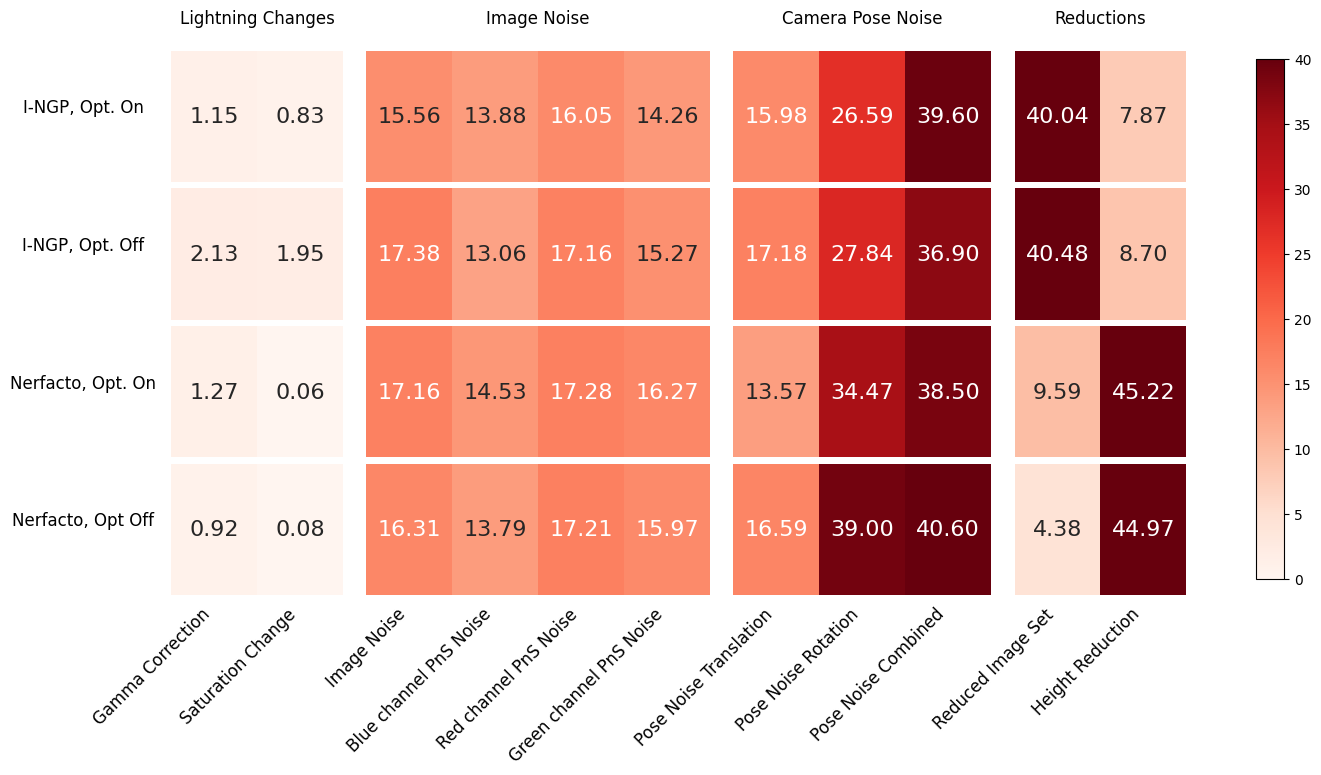

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define clusters to match the keys used in the models dictionary
clusters = {
    "Lightning Changes": ["gamma", "saturation"],
    "Image Noise": ["noise-std", "blue-noise", "red-noise", "green-noise"],
    "Camera Pose Noise": ["position", "orientation", "pos-orient"],
    "Reductions": ["range", "every"]
}

models = [psnr_heatmap_dict_ngp_on, psnr_heatmap_dict_ngp_off, psnr_heatmap_dict_nerfacto_on, psnr_heatmap_dict_nerfacto_off]
keys = ['gamma', 'saturation', 'noise-std', 'blue-noise', 'red-noise', 'green-noise', 'position', 'orientation','pos-orient', 'range', 'every']

# Update models with structured data according to clusters
models = {
    "I-NGP, Opt. On": {k: models[0][k] for k in keys},
    "I-NGP, Opt. Off": {k: models[1][k] for k in keys},
    "Nerfacto, Opt. On": {k: models[2][k] for k in keys},
    "Nerfacto, Opt Off": {k: models[3][k] for k in keys}
}

def plot_adjusted_heatmaps_no_overlap(models, clusters, label_map):
    # Set up the figure with a subplot for each cluster per model, ensuring axs is always 2D
    fig, axs = plt.subplots(len(models), len(clusters), figsize=(14, 8), 
                            gridspec_kw={'width_ratios': [len(v) for v in clusters.values()], 'wspace': 0.1, 'hspace': 0.05}, 
                            squeeze=False)

    # Plot the heatmaps
    for i, (model_name, model_scores) in enumerate(models.items()):
        for j, (cluster_name, degradation_types) in enumerate(clusters.items()):
            ax = axs[i, j]
            # Extract the specific values from the model dictionary for the current cluster
            data = [model_scores[dt] for dt in degradation_types]
            sns.heatmap(np.array(data).reshape(1, -1), ax=ax, annot=True, cmap="Reds", cbar=False, vmin=0, vmax=40, fmt=".2f",
                        annot_kws={"size": 16})
            # Label degradation types with new names, only on the last row
            if i == len(models) - 1:
                new_labels = [label_map.get(dt, dt) for dt in degradation_types]
                ax.set_xticklabels(new_labels, rotation=45, ha="right", fontsize=12)
            else:
                ax.set_xticklabels([])
            if j == 0:
                ax.set_ylabel(model_name, rotation=0, labelpad=60, fontsize = 12)
            if i == 0:
                ax.set_title(cluster_name, pad=20, fontsize = 12)
            ax.set_yticks([])
            ax.xaxis.set_ticks_position('none')

            # Visual separation between clusters
            if j < len(clusters) - 1:
                plt.setp(ax.spines['right'], visible=False)
            if j > 0:
                plt.setp(ax.spines['left'], visible=False)

    # Create an empty space on the right side of the heatmaps for the colorbar
    fig.subplots_adjust(bottom=0.2, right=0.85)  # Increase bottom and adjust right if needed

    # Shared colorbar on the right, adjusted to not overlap
    sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=40))
    cbar_ax = fig.add_axes([0.9, 0.22, 0.02, 0.65])
    fig.colorbar(sm, cax=cbar_ax, orientation='vertical')

    # Check if the save directory exists; if not, create it
    save_dir = r'C:\Stuff\Results\plots\heatmaps_clustered'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Save the figure
    plt.savefig(os.path.join(save_dir, f'heatmap_stump_psnr_clustered.pdf'), bbox_inches='tight', format='pdf', dpi=300)

    # Display the figure
    plt.show()

# Call the plotting function with the adjusted layout and new labels
plot_adjusted_heatmaps_no_overlap(models, clusters, label_map)